<a href="https://colab.research.google.com/github/sagarrokad1/Speech-Emotion-Recognition/blob/main/Notebooks/4_Transfer_Learning_on_Spectogram_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries**

In [ ]:
# IMPORT NECESSARY LIBRARIES
import librosa
import librosa.display
from tqdm import tqdm

import os, glob, sys

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
%matplotlib inline

import soundfile as sf
import IPython.display as ipd
from IPython.display import Audio

from random import randint
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

import keras
import tensorflow as tf
from keras.utils import np_utils
import tensorflow.keras as keras
from keras.models import load_model
from tensorflow.keras import layers
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import vgg19
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers, models, Model, optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense

import itertools
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#mounting the google drive to import the dataset

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
audio = "/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/Audio_data/"

###**Reading training file spectogram images**

In [ ]:
import glob
angry = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/train_logmel/angry/*.*')
calm = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/train_logmel/calm/*.*')
disgust = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/train_logmel/disgust/*.*')
fearful = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/train_logmel/fear/*.*')
happy = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/train_logmel/happy/*.*')
neutral = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/train_logmel/neutral/*.*')
sad = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/train_logmel/sad/*.*')
surprised = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/train_logmel/surprise/*.*')

In [ ]:
train_data = []
train_labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Surprised')

train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [ ]:
X_train=train_data
y_train=train_labels

###**Reading testing file spectogram images**

In [ ]:
import glob
angry = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/test_logmel/angry/*.*')
calm = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/test_logmel/calm/*.*')
disgust = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/test_logmel/disgust/*.*')
fearful = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/test_logmel/fear/*.*')
happy = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/test_logmel/happy/*.*')
neutral = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/test_logmel/neutral/*.*')
sad = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/test_logmel/sad/*.*')
surprised = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/test_logmel/surprise/*.*')

In [ ]:
test_data = []
test_labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Surprised')

test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [ ]:
X_test=test_data
y_test=test_labels

####**Some sample images**

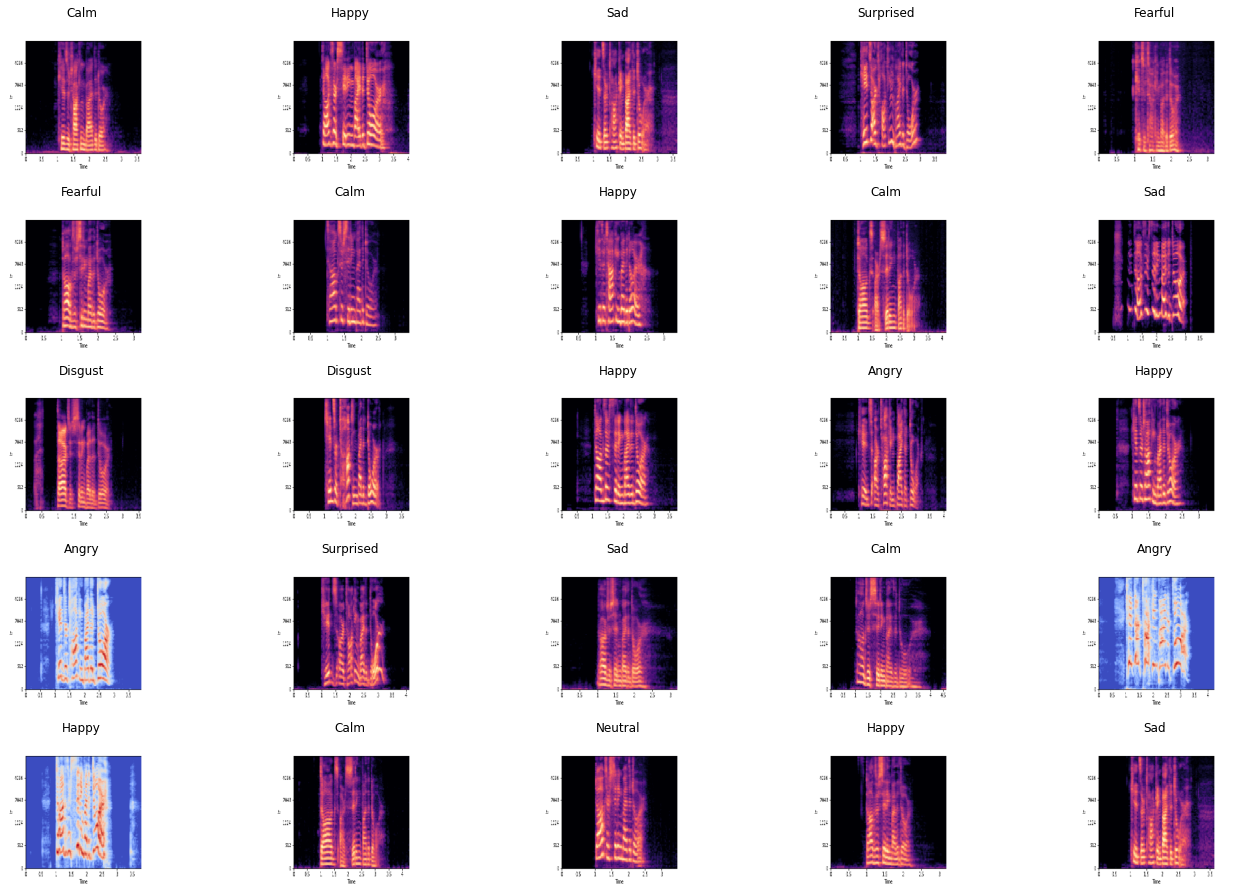

In [ ]:
def get_classlabel(class_code):
    labels = {'Angry':'Angry', 'Calm':'Calm', 'Disgust':'Disgust', 'Fearful':'Fearful', 'Happy':'Happy', 'Neutral':'Neutral','Sad':'Sad','Surprised':'Surprised'}
    
    return labels[class_code]

f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(train_data))
        ax[i,j].imshow(train_data[rnd_number])
        ax[i,j].set_title(get_classlabel(train_labels[rnd_number]))
        ax[i,j].axis('off')

In [ ]:
# Check shapes of training and testing sets
print('X_train has a shape of {}, y_train has a shape of {}'.format(X_train.shape,y_train.shape))
print('X_test has a shape of {}, y_test has a shape of {}'.format(X_test.shape,y_test.shape))

X_train has a shape of (1152, 224, 224, 3), y_train has a shape of (1152,)
X_test has a shape of (288, 224, 224, 3), y_test has a shape of (288,)


In [ ]:
# Finally, we normalize pixels in X_train and X_test to the range [0,1] for faster convergence
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

###**VGG16 Fine-Tuning**

In [ ]:
vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [ ]:
for layer in vgg_model.layers[:15]:
    layer.trainable = False

In [ ]:
# Make sure you have frozen the correct layers
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [ ]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', 
                              patience = 2, 
                              verbose=1,
                              factor=0.3, 
                              min_lr=0.000001)

checkpoint = ModelCheckpoint('finetune.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)


In [ ]:
learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Here we use testing set as validation set
history = transfer_model.fit(X_train, y_train, batch_size = 1, epochs=14, validation_data=(X_test,y_test), callbacks=[lr_reduce,checkpoint])

Epoch 1/14
1152/1152 [==============================] - 38s 28ms/step - loss: 1.9750 - accuracy: 0.2387 - val_loss: 1.7880 - val_accuracy: 0.2812

Epoch 00001: val_accuracy improved from -inf to 0.28125, saving model to finetune.h15
INFO:tensorflow:Assets written to: finetune.h15/assets
Epoch 2/14
1152/1152 [==============================] - 35s 30ms/step - loss: 1.5785 - accuracy: 0.4332 - val_loss: 1.5470 - val_accuracy: 0.5000

Epoch 00002: val_accuracy improved from 0.28125 to 0.50000, saving model to finetune.h15
INFO:tensorflow:Assets written to: finetune.h15/assets
Epoch 3/14
1152/1152 [==============================] - 33s 28ms/step - loss: 1.2738 - accuracy: 0.5252 - val_loss: 1.2282 - val_accuracy: 0.5521

Epoch 00003: val_accuracy improved from 0.50000 to 0.55208, saving model to finetune.h15
INFO:tensorflow:Assets written to: finetune.h15/assets
Epoch 4/14
1152/1152 [==============================] - 36s 31ms/step - loss: 1.0614 - accuracy: 0.6094 - val_loss: 1.1895 - val_a

In [ ]:
tf.keras.models.save_model(transfer_model,'/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/vgg.hdf5')

In [ ]:
transfer_model.save_weights('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/vgg_weights.h5')

####**Model accuracy graph**

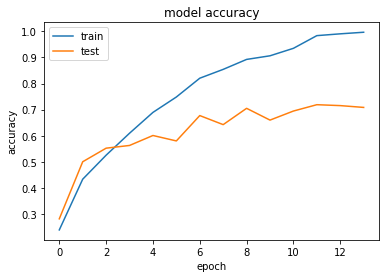

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()

####**Model loss graph**

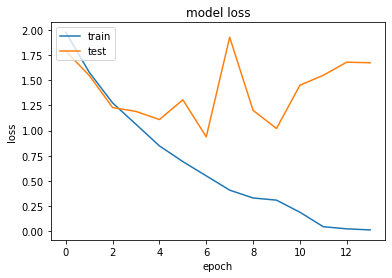

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

####**Confusion Matrix**

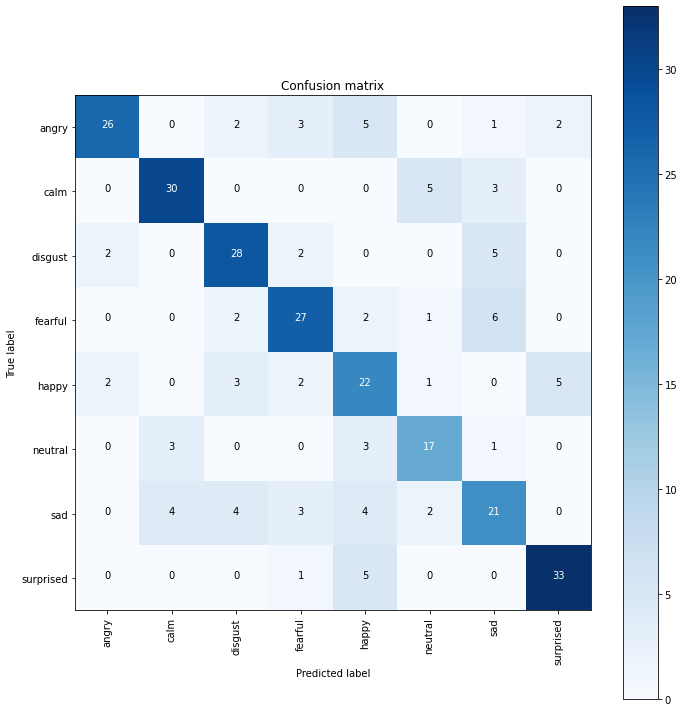

In [ ]:
y_pred = transfer_model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.87      0.67      0.75        39
        calm       0.81      0.79      0.80        38
     disgust       0.72      0.76      0.74        37
     fearful       0.71      0.71      0.71        38
       happy       0.54      0.63      0.58        35
     neutral       0.65      0.71      0.68        24
         sad       0.57      0.55      0.56        38
   surprised       0.82      0.85      0.84        39

    accuracy                           0.71       288
   macro avg       0.71      0.71      0.71       288
weighted avg       0.72      0.71      0.71       288



###**VGG19 Fine Tuning**

In [ ]:
img_height, img_width = 224,224
conv_base = vgg19.VGG19(weights='imagenet', pooling='avg', include_top=False, input_shape = (img_width, img_height, 3))

In [ ]:
for layer in conv_base.layers[:12]:
    layer.trainable = False

In [ ]:
# Make sure you have frozen the correct layers
for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

0 input_3 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_conv4 False
11 block3_pool False
12 block4_conv1 True
13 block4_conv2 True
14 block4_conv3 True
15 block4_conv4 True
16 block4_pool True
17 block5_conv1 True
18 block5_conv2 True
19 block5_conv3 True
20 block5_conv4 True
21 block5_pool True
22 global_average_pooling2d_1 True


In [ ]:
model=models.Sequential()
model.add(conv_base)
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(8,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 2056      
Total params: 20,157,768
Trainable params: 17,832,200
Non-trainable params: 2,325,568
_________________________________________________________________


In [ ]:
batch_size=16
learning_rate = 5e-5
epochs = 50
checkpoint = ModelCheckpoint("vgg_19_classifier16.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(X_train, y_train,batch_size=batch_size,
                              epochs=epochs,
                              shuffle=True, 
                              validation_data=(X_test,y_test),
                              callbacks=[checkpoint]
                              )

Epoch 1/50
72/72 [==============================] - 15s 197ms/step - loss: 1.9024 - acc: 0.2769 - val_loss: 1.6057 - val_acc: 0.4062

Epoch 00001: val_acc improved from -inf to 0.40625, saving model to vgg_19_classifier16.h5
Epoch 2/50
72/72 [==============================] - 13s 178ms/step - loss: 1.4971 - acc: 0.4444 - val_loss: 1.3640 - val_acc: 0.4688

Epoch 00002: val_acc improved from 0.40625 to 0.46875, saving model to vgg_19_classifier16.h5
Epoch 3/50
72/72 [==============================] - 14s 196ms/step - loss: 1.2609 - acc: 0.5208 - val_loss: 1.2433 - val_acc: 0.5417

Epoch 00003: val_acc improved from 0.46875 to 0.54167, saving model to vgg_19_classifier16.h5
Epoch 4/50
72/72 [==============================] - 14s 196ms/step - loss: 1.0323 - acc: 0.6181 - val_loss: 1.1119 - val_acc: 0.5938

Epoch 00004: val_acc improved from 0.54167 to 0.59375, saving model to vgg_19_classifier16.h5
Epoch 5/50
72/72 [==============================] - 14s 196ms/step - loss: 0.8316 - acc: 0.

####**Model accuracy graph**

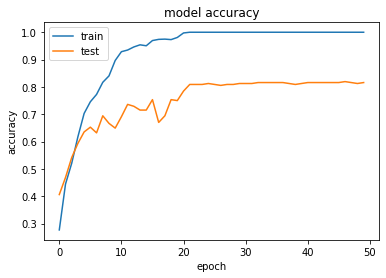

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()

####**Model loss graph**

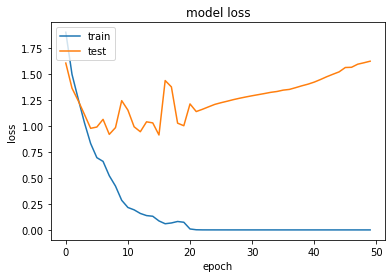

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

####**Confusion Matrix**

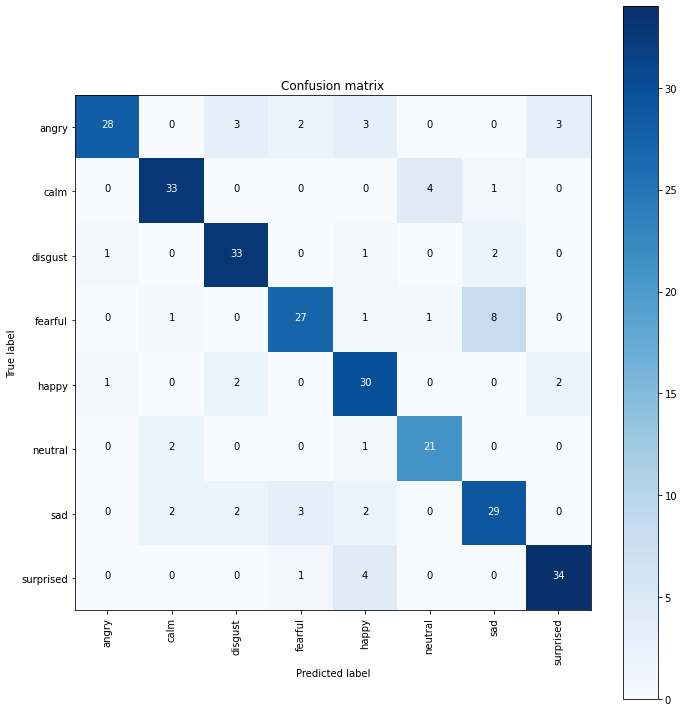

In [ ]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.93      0.72      0.81        39
        calm       0.87      0.87      0.87        38
     disgust       0.82      0.89      0.86        37
     fearful       0.82      0.71      0.76        38
       happy       0.71      0.86      0.78        35
     neutral       0.81      0.88      0.84        24
         sad       0.72      0.76      0.74        38
   surprised       0.87      0.87      0.87        39

    accuracy                           0.82       288
   macro avg       0.82      0.82      0.82       288
weighted avg       0.82      0.82      0.82       288



In [ ]:
tf.keras.models.save_model(model,'/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/vgg_fine_tuning.hdf5')

In [ ]:
model.save_weights('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/vgg_fine_tuning_weights.h5')

### **VGG19 Fine Tuning + Augmentation**

In [ ]:
#Image Data Augmentation
train_datagen = ImageDataGenerator(
                                    zoom_range=0.5,
                                   rotation_range=20,
                                   width_shift_range=0.5)

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=16)

lr_reduce = ReduceLROnPlateau(monitor='val_acc', 
                              patience = 2, 
                              verbose=1,
                              factor=0.95, 
                              min_lr=0.000001)

checkpoint = ModelCheckpoint("vgg19augm20.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

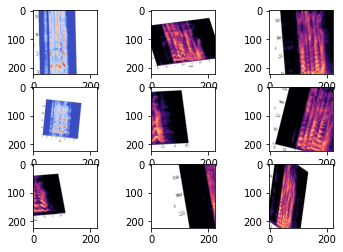

In [ ]:
img_rows, img_cols = 224, 224

for x, y in train_datagen.flow(X_train, y_train, batch_size=9):
    # Show the first 9 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(x[i].reshape(img_rows, img_cols, 3))
    # show the plot
    pyplot.show()
    break

In [ ]:
for layer in conv_base.layers[:12]:
    layer.trainable = False

In [ ]:
for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

0 input_2 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_conv4 False
11 block3_pool False
12 block4_conv1 True
13 block4_conv2 True
14 block4_conv3 True
15 block4_conv4 True
16 block4_pool True
17 block5_conv1 True
18 block5_conv2 True
19 block5_conv3 True
20 block5_conv4 True
21 block5_pool True
22 global_average_pooling2d True


In [ ]:
input_shape=(224,224,3)

model=models.Sequential()
model.add(conv_base)
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(8,activation='softmax'))
model.summary()

from tensorflow.keras import layers, models, Model, optimizers

#Initializing the hyperparameters
learning_rate = 5e-5
epochs = 80
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])
history = model.fit(train_generator,
                              epochs = epochs, 
                              # steps_per_epoch = X_train.shape[0]//batch_size, 
                              validation_data = (X_test,y_test), 
                              callbacks=[checkpoint,lr_reduce], 
                              verbose = 1,
                              shuffle=True
                              )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 2056      
Total params: 20,157,768
Trainable params: 17,832,200
Non-trainable params: 2,325,568
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/80
72/72 [==============================] - 23s 256ms/step - loss: 2.0605 - acc: 0.1701 - val_loss: 1.9424 - val_acc: 0.2257

Epoch 00001: val_acc improved from -inf to 0.22569, saving model to vgg19augm20.h5
Epoch 2/80
72/72 [==============================] - 19s 263ms/step - loss: 1.9133 - acc: 0.2517 - val_loss: 1.9163 - val_acc: 0.2396

Epoch 00002: val_acc improved from 0.22569 to 0.23958, saving model to vgg19augm20.h5
Epoch 3/80
72/72 [==============================] - 18s 249ms/step - loss: 1.8045 - acc: 0.3021 - val_loss: 1.5365 - val_acc: 0.4271

Epoch 00003: val_acc improved from 0.23958 to 0.42708, saving model to vgg19augm20.h5
Epoch 4/80
72/72 [==============================] - 18s 247ms/step - loss: 1.7726 - acc: 0.3220 - val_loss: 1.7536 - val_acc: 0.3299

Epoch 00004: val_acc did not improve from 0.42708
Epoch 5/80
72/72 [==============================] - 19s 261ms/step - loss: 1.6461 - acc: 0.3750 - val_loss: 1.3562 - val_acc: 0.4792

Epoch 00005: val_acc impr

####**Model accuracy graph**

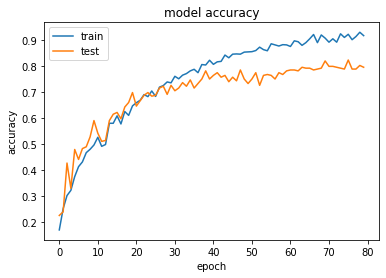

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()

####**Model loss graph**

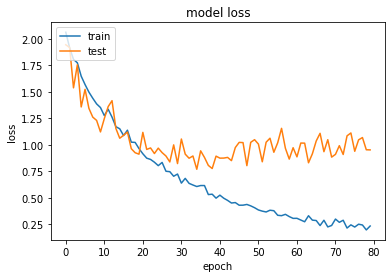

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

####**Confusion Matrix**

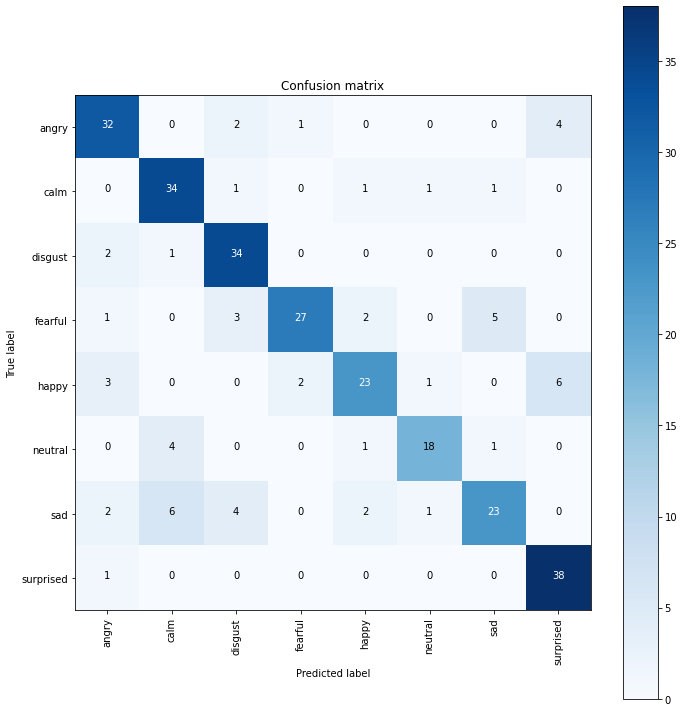

In [ ]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.78      0.82      0.80        39
        calm       0.76      0.89      0.82        38
     disgust       0.77      0.92      0.84        37
     fearful       0.90      0.71      0.79        38
       happy       0.79      0.66      0.72        35
     neutral       0.86      0.75      0.80        24
         sad       0.77      0.61      0.68        38
   surprised       0.79      0.97      0.87        39

    accuracy                           0.80       288
   macro avg       0.80      0.79      0.79       288
weighted avg       0.80      0.80      0.79       288



In [ ]:
tf.keras.models.save_model(model,'/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/vgg_aug.hdf5')

In [ ]:
model.save_weights('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/vgg_aug_weights.h5')